<a href="https://colab.research.google.com/github/nelslindahlx/Data-Analysis/blob/master/Covid19_forecast_with_Prophet_4_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example #4: Another working prophet chart

we need to import some items pandas, fbprophet, ploty (I want to use this later)

In [0]:
import pandas as pd
from fbprophet import Prophet
import fbprophet.plot
import plotly.offline as py
from plotly.offline import iplot
py.init_notebook_mode()
pd.show_versions(as_json=False) # This is added for some output on the cell

Pull in the NY Times Covid data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv')
df.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


You need to name the columns so that Prophet can use them wiht "ds" and "y"

In [0]:
df.rename(columns={"date": "ds", "cases": "y"},inplace=True) 
df['ds'] = pd.to_datetime(df['ds'],infer_datetime_format=True)
df = df[df['ds']>"2020-02-01"]
df['y'] = df['y'].astype(int)
df = df[['y','ds']]
df.head()

,y,ds
12,11,2020-02-02
13,11,2020-02-03
14,11,2020-02-04
15,12,2020-02-05
16,12,2020-02-06


Run this to set and fit the model

In [0]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


THis makes some future dataframe items

In [0]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
490,2021-06-06
491,2021-06-07
492,2021-06-08
493,2021-06-09
494,2021-06-10


We need to add to the table a bit

In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
490,2021-06-06,9.867546e+06,4.504181e+06,1.560082e+07
491,2021-06-07,9.887660e+06,4.508723e+06,1.563400e+07
492,2021-06-08,9.908260e+06,4.500017e+06,1.567983e+07
493,2021-06-09,9.929439e+06,4.501471e+06,1.572661e+07
494,2021-06-10,9.952750e+06,4.500771e+06,1.577315e+07


Let's run the plot forecast

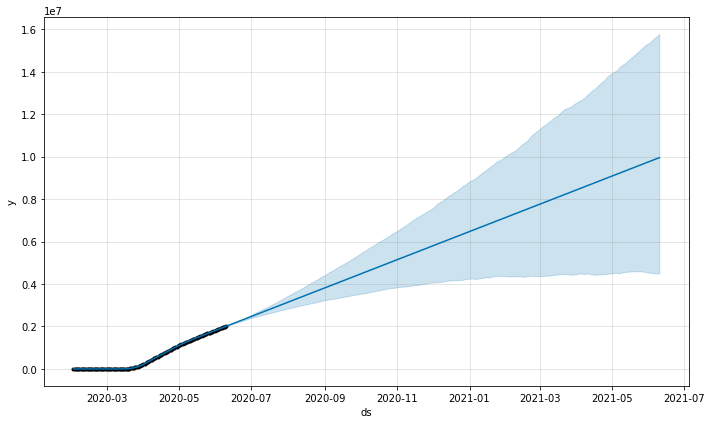

In [0]:
fig1 = m.plot(forecast)

# Example #3: Some working prophet charts

This is to import some things we need to complete the example pandas, fbprophet, and plotly.offline

In [0]:
import pandas as pd
from fbprophet import Prophet
import fbprophet.plot
import plotly.offline as py
from plotly.offline import iplot
py.init_notebook_mode()
pd.show_versions(as_json=False) # This is added for some output on the cell

Ok let's go grab some data from the live NYTimes Covid csv

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv')
df.head()

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


For the prophet to run without being angry you need to have clearly labeled columns "ds" and "y"

In [0]:
df.rename(columns={"date": "ds", "cases": "y"},inplace=True) 
df['ds'] = pd.to_datetime(df['ds'],infer_datetime_format=True)
df = df[df['ds']>"2020-02-01"]
df['y'] = df['y'].astype(int)
df = df[['y','ds']]
df.head()

,y,ds
12,11,2020-02-02
13,11,2020-02-03
14,11,2020-02-04
15,12,2020-02-05
16,12,2020-02-06


Let's run the model so Prophet can plot some charts

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


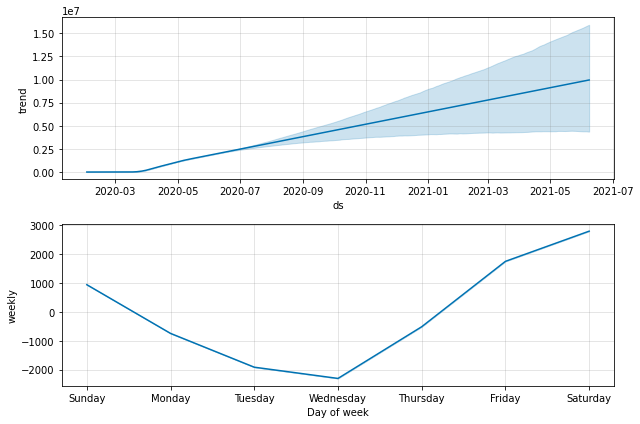

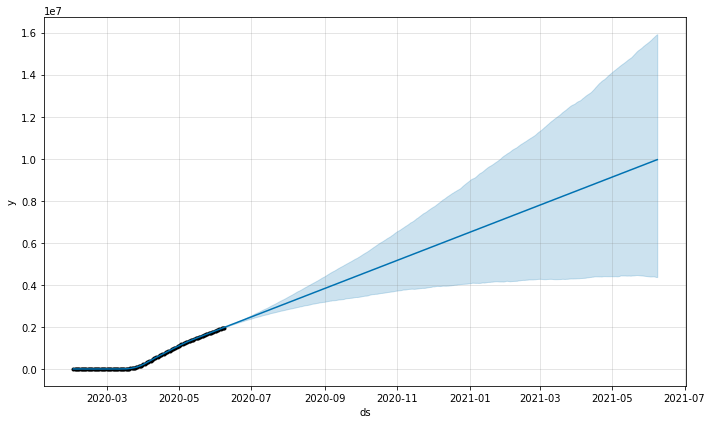

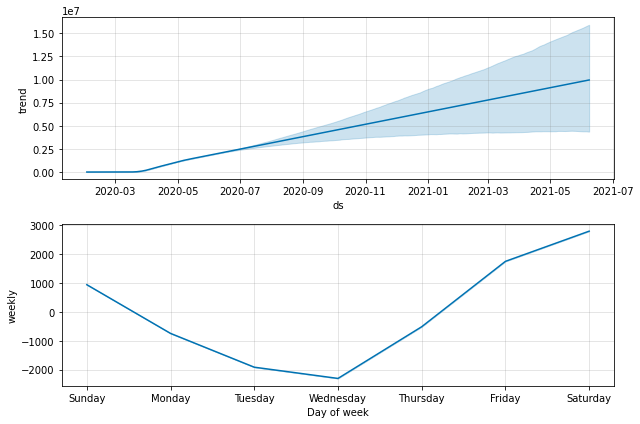

In [0]:
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
model.plot(forecast)
model.plot_components(forecast)

# Example #2: Forecast using NYTimes live data on GitHub

We need to import pandas and Prophet

In [0]:
import pandas as pd
from fbprophet import Prophet

This grabs the live data from the NY Times GitHub

In [0]:
url="https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv"
df=pd.read_csv(url)

This sets the period to forecast

In [0]:
period_to_forecast = 45

For Prophet to work we need to ensure columns are named "ds" and "y"

In [0]:
df.rename(columns={"date": "ds", "cases": "y"},inplace=True) 
df['ds'] = pd.to_datetime(df['ds'],infer_datetime_format=True)
df = df[df['ds']>"2020-02-01"]
df['y'] = df['y'].astype(int)
df = df[['y','ds']]

Need to run Prophet and execute a graph

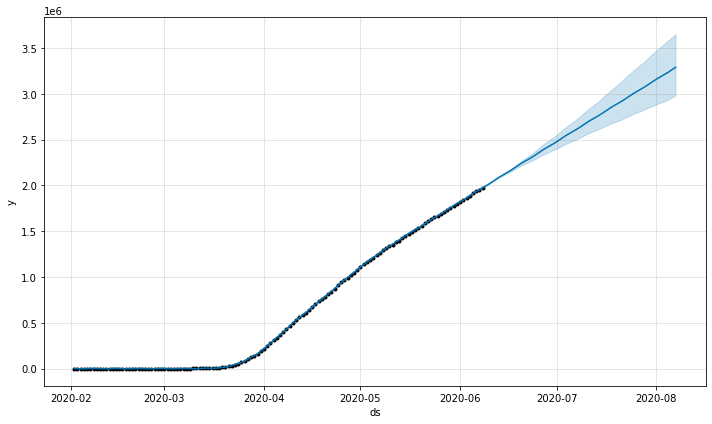

In [0]:
pred = Prophet(yearly_seasonality=False, daily_seasonality=False)
pred.fit(df)
future = pred.make_future_dataframe(periods=60)
forecast = pred.predict(future)
graph = pred.plot(forecast)

# Example #1: Forecast using NYTimes live data on GitHub

Install fbprophet using pip

In [0]:
!pip3 install fbprophet

We need to import pandas, numpy, matpoltlib, and Prophet

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet

We need to grab some data. Let's use the NYT Covid dataset from GitHub

In [0]:
# url="https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv"
# df=pd.read_csv(url)
covid_df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv', index_col='date',parse_dates=True)
covid_df.head()

,cases,deaths
date,,
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,0
2020-01-25,3,0


To use Prophet we have to rename the columns to "ds" and "y" or it will be unhappy

In [0]:
df = covid_df.reset_index()
df.head()
df=df.rename(columns={'date':'ds', 'cases':'y'})
# df=df.rename(columns={'date':'ds', 'deaths':'y'})
df.head()

,ds,y,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0


In [0]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


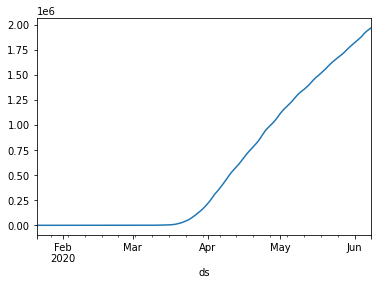

In [0]:
df.set_index('ds').y.plot()